In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# # MERGING DATA
# data1 = pd.read_csv('Crime_Data_from_2010_to_2019.csv')
# data2 = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# merged_data = pd.concat([data1, data2])
# merged_data.to_csv('data.csv')

In [4]:
# IMPORT DATA
data = pd.read_csv('data.csv')

In [5]:
# Adding day of week 

# from datetime import datetime
# days = data['DATE OCC'].tolist()
# day_of_week = list()
# for i in days:
#     day_of_week.append((datetime.strptime(i, '%m/%d/%Y %H:%M:%S %p')).isoweekday())

# data['DAY IN WEEK'] = day_of_week
# data.to_csv('data.csv')


In [6]:
# All the possible weapons
print("All possible weapon used: ")
weapons = data['Weapon Desc'].unique()
for i in range(0,len(weapons)):
    print(i, "   ", weapons[i])

All possible weapon used: 
0     nan
1     HAND GUN
2     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
3     UNKNOWN WEAPON/OTHER WEAPON
4     VERBAL THREAT
5     SIMULATED GUN
6     FOLDING KNIFE
7     OTHER KNIFE
8     MACE/PEPPER SPRAY
9     STICK
10     UNKNOWN FIREARM
11     SWITCH BLADE
12     KNIFE WITH BLADE 6INCHES OR LESS
13     BOARD
14     BLUNT INSTRUMENT
15     SEMI-AUTOMATIC PISTOL
16     VEHICLE
17     OTHER CUTTING INSTRUMENT
18     SCISSORS
19     BOTTLE
20     KNIFE WITH BLADE OVER 6 INCHES IN LENGTH
21     BELT FLAILING INSTRUMENT/CHAIN
22     AUTOMATIC WEAPON/SUB-MACHINE GUN
23     CLUB/BAT
24     BRASS KNUCKLES
25     KITCHEN KNIFE
26     AIR PISTOL/REVOLVER/RIFLE/BB GUN
27     SCREWDRIVER
28     FIRE
29     STUN GUN
30     RIFLE
31     RAZOR BLADE
32     DIRK/DAGGER
33     CAUSTIC CHEMICAL/POISON
34     SHOTGUN
35     ICE PICK
36     BOMB THREAT
37     ROCK/THROWN OBJECT
38     REVOLVER
39     OTHER FIREARM
40     DEMAND NOTE
41     BOWIE KNIFE
42     HECKLER &

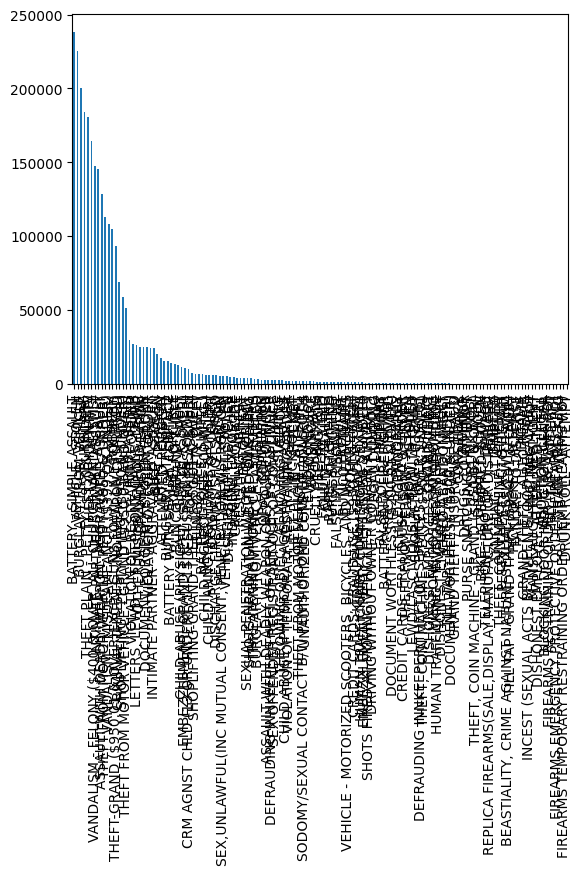

BATTERY - SIMPLE ASSAULT                                    238492
VEHICLE - STOLEN                                            225484
BURGLARY FROM VEHICLE                                       200114
BURGLARY                                                    184307
THEFT PLAIN - PETTY ($950 & UNDER)                          180816
THEFT OF IDENTITY                                           164596
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     147286
INTIMATE PARTNER - SIMPLE ASSAULT                           145650
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              128192
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             112925
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    108013
ROBBERY                                                     105002
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     93305
CRIMINAL THREATS - NO WEAPON DISPLAYED                       69173
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     5

In [7]:
# Frequency of each level of crime
frequency = data['Crm Cd Desc'].value_counts()
frequency.plot(kind = 'bar')
plt.show()
print(frequency.to_string())

In [8]:
# Frequency of Crime in hour
time_in_hours = (data['TIME OCC'] / 100).round()
frequency = time_in_hours.value_counts()
print(frequency.to_string())

12.0    215891
18.0    167748
20.0    160923
19.0    147258
17.0    146821
16.0    145999
22.0    144852
21.0    139594
15.0    136142
14.0    135971
10.0    119303
8.0     114208
13.0    113647
23.0    112110
0.0     111695
11.0    106200
9.0      97494
1.0      75283
2.0      70473
7.0      65443
6.0      51296
3.0      50127
4.0      43185
5.0      35839
24.0     12045


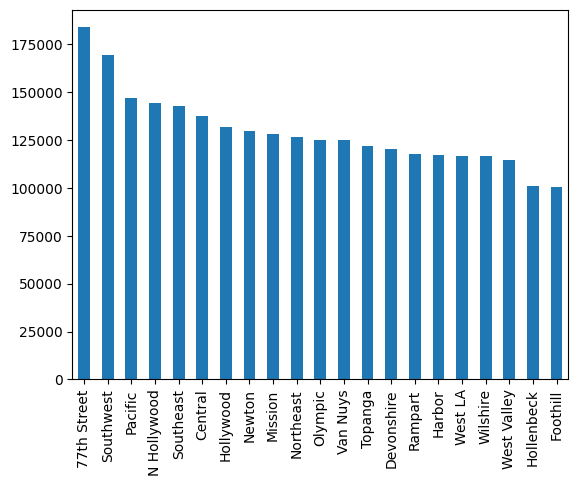

In [9]:
# Frequency by county
data2 = pd.read_csv('HourCountyMonth.csv')
frequency = data['AREA NAME'].value_counts()
frequency.plot(kind = 'bar')
plt.show()

In [10]:
severity_mapping = {
'VIOLATION OF COURT ORDER':    3,
'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 3,
'OTHER MISCELLANEOUS CRIME':   1,
'RAPE, ATTEMPTED':     4,
'SHOPLIFTING - PETTY THEFT ($950 & UNDER)':    1,
'BURGLARY FROM VEHICLE':   2,
'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':  4,
'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD':    1,
'BATTERY - SIMPLE ASSAULT':    4,
'ROBBERY':     4,
'BOMB SCARE':      2,
'CHILD NEGLECT (SEE 300 W.I.C.)':  3,
'INTIMATE PARTNER - AGGRAVATED ASSAULT':   4,
'INTIMATE PARTNER - SIMPLE ASSAULT':   4,
'THEFT PLAIN - PETTY ($950 & UNDER)':  1,
'CRIMINAL THREATS - NO WEAPON DISPLAYED':  3,
'ATTEMPTED ROBBERY':   1,
'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':    2,
'BURGLARY':    2,
'ARSON':   4,
'RAPE, FORCIBLE':  4,
'BRANDISH WEAPON': 3,
'THROWING OBJECT AT MOVING VEHICLE':   4,
'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)':    3,
'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT':     3,
'SHOTS FIRED AT INHABITED DWELLING':   4,
'VEHICLE - STOLEN':    1,
'KIDNAPPING - GRAND ATTEMPT':  4,
'CRIMINAL HOMICIDE':   3,
'THEFT PLAIN - ATTEMPT':   1,
'THEFT, PERSON':   1,
'TRESPASSING': 1,
'KIDNAPPING':  4,
'VEHICLE - ATTEMPT STOLEN':    1,
'BATTERY WITH SEXUAL CONTACT': 4,
'DOCUMENT FORGERY / STOLEN FELONY':    1,
'BATTERY POLICE (SIMPLE)': 2,
'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT':     3,
'DISTURBING THE PEACE':    1,
'OTHER ASSAULT':   4,
'VIOLATION OF RESTRAINING ORDER':  1,
'LEWD CONDUCT':    1,
'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)':    3,
'THEFT OF IDENTITY':   1,
'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER':    4,
'CHILD ANNOYING (17YRS & UNDER)':  1,
'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 4,
'ORAL COPULATION': 3,
'CRUELTY TO ANIMALS':  2,
'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 1,
'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 1,
'PEEPING TOM': 1,
'INDECENT EXPOSURE':   2,
'BIKE - STOLEN':   1,
'BURGLARY FROM VEHICLE, ATTEMPTED':    2,
'BURGLARY, ATTEMPTED': 2,
'STALKING':    2,
'THREATENING PHONE CALLS/LETTERS':     3,
'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ':    3,
'BUNCO, PETTY THEFT':  1,
'BUNCO, GRAND THEFT':  1,
'VIOLATION OF TEMPORARY RESTRAINING ORDER':    1,
'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)':  2,
'SEXUAL PENETRATION W/FOREIGN OBJECT': 3,
'EXTORTION':   2,
'PICKPOCKET':  1,
'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':    1,
'PURSE SNATCHING': 3,
'WEAPONS POSSESSION/BOMBING':  4,
'COUNTERFEIT': 1,
'FALSE IMPRISONMENT':  1,
'CREDIT CARDS, FRAUD USE ($950.01 & OVER)':    1,
'DISCHARGE FIREARMS/SHOTS FIRED':  4,
'THEFT FROM PERSON - ATTEMPT': 2,
'UNAUTHORIZED COMPUTER ACCESS':    1,
'PANDERING':   1,
'PIMPING': 1,
'DRUNK ROLL - ATTEMPT':    1,
'SHOPLIFTING - ATTEMPT':   1,
'RESISTING ARREST':    3,
'DISHONEST EMPLOYEE - GRAND THEFT':    2,
'RECKLESS DRIVING':    1,
'PROWLER': 1,
'CREDIT CARDS, FRAUD USE ($950 & UNDER':   1,
'DOCUMENT WORTHLESS ($200.01 & OVER)': 1,
'CHILD STEALING':  4,
'CONTEMPT OF COURT':   1,
'CONSPIRACY':  1,
'THEFT FROM MOTOR VEHICLE - ATTEMPT':  1,
'DRUNK ROLL':  1,
'BATTERY ON A FIREFIGHTER':    1,
'ILLEGAL DUMPING': 1,
'LYNCHING':    3,
'THEFT, COIN MACHINE - PETTY ($950 & UNDER)':  1,
'GRAND THEFT / INSURANCE FRAUD':   1,
'BUNCO, ATTEMPT':  1,
'DISRUPT SCHOOL':  1,
'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)':    1,
'FALSE POLICE REPORT': 1,
'PURSE SNATCHING - ATTEMPT':   2,
'BOAT - STOLEN':   1,
'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT':    3,
'DRIVING WITHOUT OWNER CONSENT (DWOC)':    2,
'CONTRIBUTING':    1,
'FAILURE TO YIELD':    2,
'TILL TAP - ATTEMPT':  1,
'DRUGS, TO A MINOR':   4,
'INCITING A RIOT': 4,
'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM':    1,
'BRIBERY': 2,
'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 2,
'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER':    1,
'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01':    1,
'TILL TAP - GRAND THEFT ($950.01 & OVER)': 1,
'LYNCHING - ATTEMPTED':    2,
'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE':   3,
'CHILD ABANDONMENT':   3,
'LEWD/LASCIVIOUS ACTS WITH CHILD': 1,
'DISHONEST EMPLOYEE - PETTY THEFT':    1,
'TELEPHONE PROPERTY - DAMAGE': 1,
'PICKPOCKET, ATTEMPT': 1,
'TILL TAP - PETTY ($950 & UNDER)': 1,
'DOCUMENT WORTHLESS ($200 & UNDER)':   1,
'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 3,
'MANSLAUGHTER, NEGLIGENT': 4,
'GRAND THEFT / AUTO REPAIR':   2,
'BIGAMY':  1,
'THEFT, COIN MACHINE - ATTEMPT':   1,
'PETTY THEFT - AUTO REPAIR':   1,
'BIKE - ATTEMPTED STOLEN': 1,
'FAILURE TO DISPERSE': 1,
'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)':    2,
'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':   3,
'CHILD PORNOGRAPHY':   3,
'ABORTION/ILLEGAL':    1,
'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)':    2,
'DISHONEST EMPLOYEE ATTEMPTED THEFT':  1,
'TRAIN WRECKING':  1,
'BLOCKING DOOR INDUCTION CENTER':  1,
'FIREARMS RESTRAINING ORDER (FIREARMS RO)':    2,
'VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS': 1,
'FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)': 1,
'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)':  2
}

In [11]:
# check if every row has a corresponding severity
for index, row in data.iterrows():
    try:
        if(row['Crm Cd Desc'] not in severity_mapping):
            print(row['Crm Cd Desc'])
    except:
        print(row['Crm Cd Desc'])

In [34]:
from collections import defaultdict
import math

## GOAL: create buckets such that we know when and where there is no crime and when and where there is a lot
# Step 1: create dictionary so that we can get instant lookup
# dictionary uses default dict for ease of life, assume it works same as normal dictionary
# check out https://www.geeksforgeeks.org/defaultdict-in-python/ for more info

# dictionary stores all crimes and their corresponding severity for each bucket 
# stored as an array of crime severities
data_mapping = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: list())))
# county: {month: {hour: severity}}
# "orange county": {
#    1: {
# 0: []
# 1: []
# }
print(type(data['TIME OCC'].loc[1]))

for index, row in data.iterrows():
    hour = math.floor((row['TIME OCC'] / 100))
    county_code = row['AREA NAME']
    month = (data['DATE OCC']).str.split('/').str[0] # split with /, get the first element

    data_mapping[county_code][month[index]][hour].append(int(severity_mapping[row['Crm Cd Desc']]))
    break

# for county in data_mapping:
#     for month in range(1, 13):
#         for hour in range(24):
#             ## TODO: create datafram for buckets and save to csv
#             print(county, month, hour, data_mapping[county][month][hour])
#     break

<class 'numpy.int64'>


In [36]:
print(data_mapping['Central'][1][20])

[]


In [14]:
# SAVING AS A FILE
import pickle
import dill
loaded_dict = open('data_mapping', 'wb')
loaded_dict.write(dill.dumps(data_mapping))
loaded_dict.close()

In [37]:
# Step 2: create buckets for each day of the week
# want to loop through each day of the week and create a bucket for each hour of the day
# then want to use the dictionary  to fill in the buckets.
from collections import defaultdict

data_mapping2 = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: list())))


for index, row in data.iterrows():
    hour = round((row['TIME OCC'] / 100))
    county_code = row['AREA NAME']
    day = row['DAY IN WEEK']

    data_mapping2[county_code][day][hour].append(int(severity_mapping[row['Crm Cd Desc']]))
    break


In [25]:
print(data_mapping2['Newton'][1][15])

[]
